In [235]:
import numpy as np
import nltk
import word2vec
import transformers
import requests
import pandas as pd
import matplotlib.pyplot as plt


datasource_config_file = '../data/datasources.yaml'

# Exemplo Simples com Word2Vec

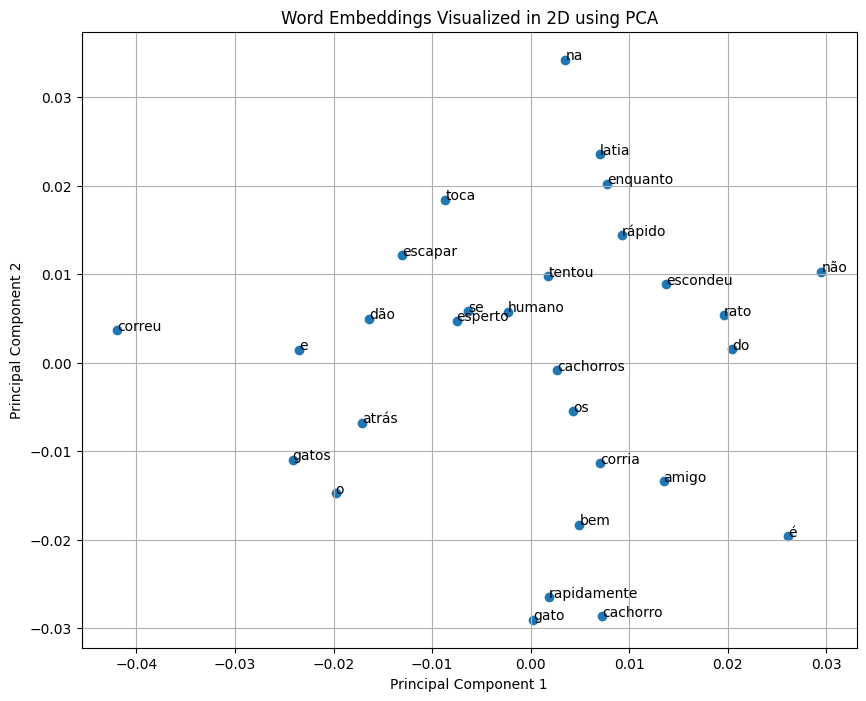

In [4]:
# Import necessary libraries
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Example sentences (corpus)
corpus = [
    ['gato', 'correu', 'rapidamente', 'atrás', 'do', 'rato'],
    ['o', 'gato', 'é', 'rápido', 'e', 'esperto'],
    ['o', 'rato', 'se', 'escondeu', 'na', 'toca'],
    ['o', 'cachorro', 'latia', 'enquanto', 'corria', 'atrás', 'do', 'gato'],
    ['os', 'gatos', 'e', 'os', 'cachorros', 'não', 'se', 'dão', 'bem'],
    ['o', 'cachorro', 'é', 'amigo', 'do', 'humano'],
    ['o', 'rato', 'tentou', 'escapar', 'do', 'gato']
]

# Train the Word2Vec model
model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)

# Get words in the model's vocabulary
words = list(model.wv.index_to_key)

# Get the word embeddings
word_embeddings = [model.wv[word] for word in words]

# Use PCA to reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
result = pca.fit_transform(word_embeddings)

# Plot the embeddings in 2D
plt.figure(figsize=(6, 6))
plt.scatter(result[:, 0], result[:, 1])

# Annotate each point with the corresponding word
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

# Show the plot
plt.title('Word Embeddings Visualized in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# Corpus Machado de Assis

In [16]:
filepath = '../data/machado/obras_machado_de_assis.csv'

data = pd.read_csv(filepath, index_col=None)
data.head(2)

,arquivo,caminho completo,categoria,autor,paginas,titulo,edicao,publicacao,publicacao ano,publicacao editora,publicacao cidade,edicao ano,edicao editora,edicao cidade,edicao titulo,edicao volume,texto
0,revelacoes.pdf,./pdf/crítica/revelacoes.pdf,crítica,Machado de Assis,5,"Revelações. Poesias de A. E. Zaluar, Garnier e...",Texto-Fonte: Crítica Literária de Machado de A...,Publicado originalmente no Diário do Rio de Ja...,1863,Diário do Rio de Janeiro,Rio de Janeiro,1938,W. M. Jackson,Rio de Janeiro,Crítica Literária de Machado de Assis,NaN,"Revelações. Poesias de A. E. Zaluar, Garnier e..."
1,magalhaes.pdf,./pdf/crítica/magalhaes.pdf,crítica,Machado de Assis,4,Magalhães de Azeredo: Horas sagradas; Mário de...,Texto-Fonte: Obra Completa de Machado de Assis...,"Publicado na Gazeta de Notícias, 07/12/1902.",1902,Gazeta de Notícias,Rio de Janeiro,1994,Nova Aguilar,Rio de Janeiro,Obra Completa de Machado de Assis,III,Magalhães de Azeredo: Horas sagradas; Mário de...


## Quantidade de Obras por Categoria

<Axes: title={'center': 'Distribuição de Obras por Categoria'}, xlabel='Total Obras', ylabel='categoria'>

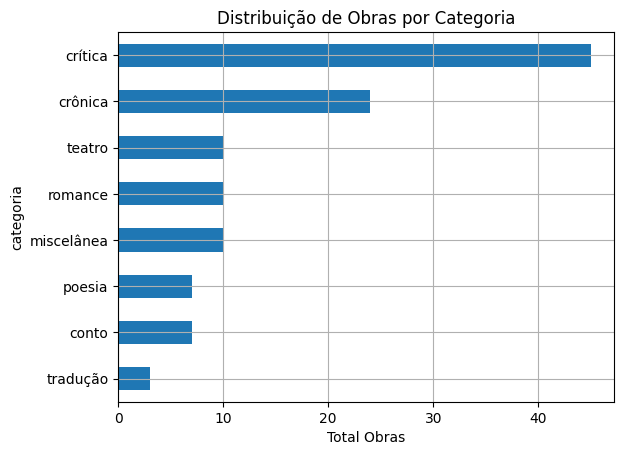

In [24]:
(data.groupby('categoria')
    .arquivo.nunique()
    .sort_values()
    .plot.barh(
        xlabel='Total Obras',
        grid=1,
        title='Distribuição de Obras por Categoria'
    )
)

## Pré-processamento do Corpus para montar o Vocabulário

In [64]:
category_name = 'romance'

# SELECAO DE OBRAS DA CATEGORIA
corpus = data[data.categoria == category_name].texto.tolist()
obras = data[data.categoria == category_name].titulo.tolist()
print('Corpus com', len(corpus), 'obras')

# PROCESSO SEPARACAO DE PALAVRAS
# words = nltk.tokenize.word_tokenize(obras[1])
# words = [nltk.tokenize.word_tokenize(o) for o in corpus] # por obra
# words = [nltk.tokenize.wordpunct_tokenize(o) for o in corpus] # por obra
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
corpus = [tokenizer.tokenize(o) for o in corpus] # por obra

# DOWNLOAD DOS ARQUIVOS COM STOPWORDS
nltk.download('stopwords')
from nltk.corpus import stopwords
pt_stopwords = stopwords.words('portuguese')
print('Total de stopwords', len(pt_stopwords))
corpus = [[w for w in o if w not in pt_stopwords] for o in corpus]
corpus[0][:20]

Corpus com 10 obras
Total de stopwords 207


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ciodaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Memórias',
 'Póstumas',
 'Brás',
 'Cubas',
 'Ao',
 'verme',
 'primeiro',
 'roeu',
 'frias',
 'carnes',
 'cadáver',
 'dedico',
 'saudosa',
 'lembrança',
 'Memórias',
 'Póstumas',
 'Prólogo',
 'terceira',
 'edição',
 'A']

## Word2Vec

In [77]:
model.wv['Bentinho']

array([-0.07099461,  0.05900519,  0.45152798,  0.5055747 , -0.34812966,
       -0.03594458,  0.10445843,  0.20459285, -0.6251484 ,  0.15299463,
        0.42176616, -0.19862673,  0.20819567, -0.2431815 ,  0.43324867,
        0.26331958,  0.5516163 , -0.19130023, -0.3335888 , -0.61525303],
      dtype=float32)

In [129]:


model = gensim.models.Word2Vec(
    sentences=corpus,
    vector_size=100,
    alpha=0.025,
    window=25,
    min_count=10,
    seed=1,
    workers=3,
    sg=0,
)

# Train the Word2Vec model
# model = Word2Vec(corpus, vector_size=20, window=10, min_count=5, workers=4)
# Get words in the model's vocabulary
words = list(model.wv.index_to_key)
# Get the word embeddings
word_embeddings = [model.wv[word] for word in words]
# Use PCA to reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
result = pca.fit_transform(word_embeddings)

In [130]:
def strip_score(result):
    return [w for w, s in result]
# Lista as palavras mais próximas
def closest_words(word, model, num=5):
    word_score_pair = model.wv.most_similar(word, topn=num)
    return strip_score(word_score_pair)

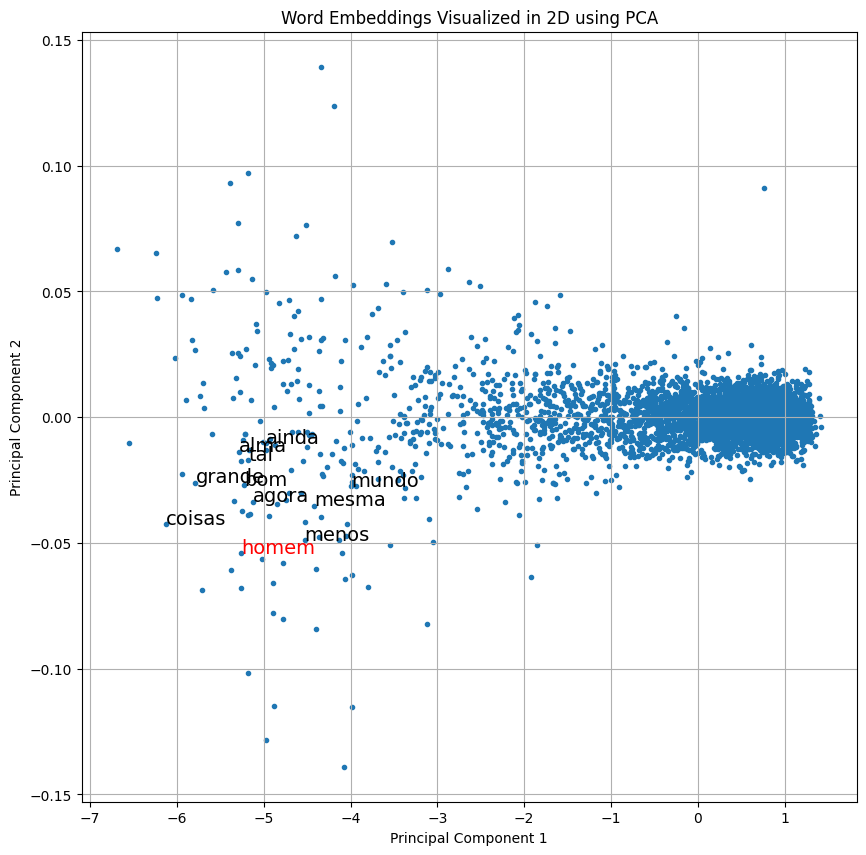

In [140]:
keyword = 'homem' #, 'Cubas', 'Brás', 'Capitu','Bentinho']


# Plot the embeddings in 2D
plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1], marker='.')
# Annotate each point with the corresponding word
annotate_words = closest_words(keyword, model, num=10)
for word in annotate_words:    
    xpos = pca.transform([model.wv[word]])
    plt.annotate(word, xy=xpos[0], size=14, c='k')
xpos = pca.transform([model.wv[keyword]])
plt.annotate(keyword, xy=xpos[0], c='red', size=14)
# Show the plot
plt.title('Word Embeddings Visualized in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# Corpus Brasileiro

In [175]:
import glob

filepaths = glob.glob('../data/Brazilian_Portugese_Corpus/*.txt')
corpus = [' '.join(open(f, encoding='latin-1').readlines()) for f in filepaths]

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
corpus = [tokenizer.tokenize(o) for o in corpus] # por obra

# DOWNLOAD DOS ARQUIVOS COM STOPWORDS
nltk.download('stopwords')
from nltk.corpus import stopwords
pt_stopwords = stopwords.words('portuguese')
print('Total de stopwords', len(pt_stopwords))
corpus = [[w for w in o if w not in pt_stopwords] for o in corpus]
# UNIDECODE
from unidecode import unidecode
corpus = [unidecode(' '.join(o).lower()) for o in corpus]
corpus = [tokenizer.tokenize(o) for o in corpus] # por obra

len(corpus)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ciodaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Total de stopwords 207


81

In [271]:

model = gensim.models.Word2Vec(
    sentences=corpus,
    vector_size=50,
    # alpha=0.025,
    window=10,
    min_count=20,
    seed=1,
    workers=8,
    sg=0,
    epochs = 100
)

# Train the Word2Vec model
# model = Word2Vec(corpus, vector_size=20, window=10, min_count=5, workers=4)
# Get words in the model's vocabulary
words = list(model.wv.index_to_key)
# Get the word embeddings
word_embeddings = [model.wv[word] for word in words]
# Use PCA to reduce the dimensions to 2D for visualization
pca = PCA(n_components=2)
result = pca.fit_transform(word_embeddings)

In [263]:
len(model.wv.key_to_index)

12320

In [264]:
# model.wv.key_to_index
model.wv.index_to_key[100:130]

['outros',
 'amigo',
 'palavras',
 'melhor',
 'tanto',
 'lado',
 'vai',
 'talvez',
 'respondeu',
 'mesma',
 'perguntou',
 'parte',
 'sala',
 'olhar',
 'sr',
 'de',
 'filho',
 'as',
 'ora',
 'verdade',
 'apenas',
 'um',
 'mundo',
 'ninguem',
 'tal',
 'oh',
 'quando',
 'quase',
 'fim',
 'espirito']

In [265]:
model.wv['amigo']

array([-0.27299815, -0.07239497, -0.354358  , -0.5015487 ,  0.52715784,
       -0.09163974, -0.28607923, -0.09767792, -0.09576011, -0.16158137,
       -0.09126001, -0.22366777,  0.4292517 ,  0.24315527, -0.3966541 ,
        0.10997685,  0.19638573, -0.04893836,  0.53098845, -0.01038058,
        0.04967822, -0.14379424,  0.60272676,  0.1188256 ,  0.02812902,
        0.03602713,  0.33455554, -0.15769525, -0.0603467 , -0.04001101,
       -0.12392649, -0.19055612,  0.0205115 ,  0.18319264,  0.01128783,
        0.03667619,  0.08215842, -0.37906224,  0.08282262,  0.0074549 ,
       -0.15489304, -0.05810327,  0.23936434,  0.01213687,  0.20958386,
        0.20389359, -0.06621427,  0.13627072,  0.37540728,  0.05073568],
      dtype=float32)

In [272]:
model.wv.most_similar(positive=['vinho'], topn=10)

[('assado', 0.7301238179206848),
 ('garrafa', 0.6640982031822205),
 ('parati', 0.656848132610321),
 ('calice', 0.6161214113235474),
 ('aguardente', 0.6064625382423401),
 ('gole', 0.5992172360420227),
 ('licor', 0.5919175744056702),
 ('beber', 0.5840018391609192),
 ('farinha', 0.58228999376297),
 ('bocado', 0.5766544938087463)]

In [273]:
model.wv.most_similar(positive=['amigo'], topn=10)

[('colega', 0.6469846367835999),
 ('tio', 0.6309322714805603),
 ('parente', 0.5539858341217041),
 ('companheiro', 0.5261495113372803),
 ('afiancou', 0.5234812498092651),
 ('franqueza', 0.5178951025009155),
 ('dedicado', 0.5145034790039062),
 ('doutor', 0.506887674331665),
 ('servo', 0.5022550225257874),
 ('irmao', 0.47895050048828125)]

In [274]:
model.wv.most_similar(positive=['noivo', 'mulher'], negative = ['homem'] ,topn=10)

[('noiva', 0.6173166036605835),
 ('casava', 0.5608611702919006),
 ('ama', 0.5428779721260071),
 ('viuva', 0.5415679812431335),
 ('moca', 0.5168151259422302),
 ('viuvez', 0.5089764595031738),
 ('esposa', 0.49623164534568787),
 ('enferma', 0.4935334026813507),
 ('clorinda', 0.48883965611457825),
 ('afilhada', 0.48598960041999817)]

In [285]:
model.wv.most_similar(positive=['flor', 'inseto'], topn=10)

[('abelha', 0.6181495785713196),
 ('plantas', 0.5757462978363037),
 ('cinza', 0.5636845827102661),
 ('asa', 0.5521116852760315),
 ('roseira', 0.546724259853363),
 ('fruto', 0.5345573425292969),
 ('bafejo', 0.5080856084823608),
 ('ramo', 0.5070117712020874),
 ('passaro', 0.5030154585838318),
 ('aroma', 0.49934515357017517)]

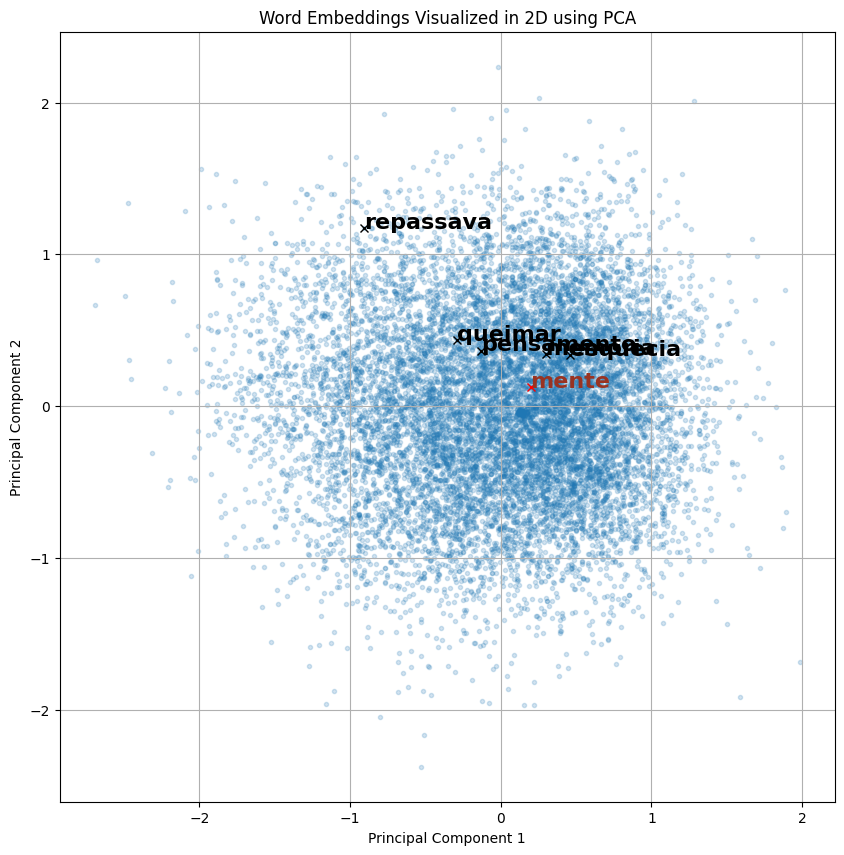

In [270]:
keyword = 'mente' #, 'Cubas', 'Brás', 'Capitu','Bentinho']

# Plot the embeddings in 2D
plt.figure(figsize=(10, 10))
plt.scatter(result[:, 0], result[:, 1], marker='.', alpha=0.2)
# Annotate each point with the corresponding word
annotate_words = closest_words(keyword, model, num=5)
for word in annotate_words:    
    xpos = pca.transform([model.wv[word]])
    plt.annotate(word, xy=xpos[0], size=16, c='k', weight='bold')
    plt.plot(xpos[0][0], xpos[0][1], 'kx')
xpos = pca.transform([model.wv[keyword]])
plt.annotate(keyword, xy=xpos[0], size=16, c='#993322', weight='bold')
plt.plot(xpos[0][0], xpos[0][1], 'rx')
# Show the plot
plt.title('Word Embeddings Visualized in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()
